Chest Xray classification

In [2]:
## Importing necessary libraries

import tensorflow as tf 
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from tensorflow.keras.optimizers import Adam


**Mount the drive**

In [3]:
## Mounting drive to collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Train and test folders

In [4]:
## Train and test folders

train_folder = '/content/drive/My Drive/ChestXRay2017/chest_xray/train'
test_folder = '/content/drive/My Drive/ChestXRay2017/chest_xray/test'

In [5]:
## Reading and checking labels in test and train folder

train_files = os.listdir(train_folder)
test_files = os.listdir(test_folder)

print(train_files)
print(test_files)

['PNEUMONIA', 'NORMAL']
['NORMAL', 'PNEUMONIA']


Displaying the image

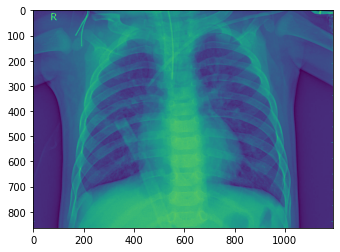

In [ ]:
## Showing an image from train/test folder 
subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = random.choice(subfolders) ## selecting random folder
subfolder_path = os.path.join(train_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(subfolder_path) ## get all file names from sub folder
file_name = random.choice(file_names) ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image
## Showing the image
plt.imshow(image)
plt.show()

Pre-processing of the image

In [ ]:
## Pre  processing of all the image dataset by resizing it
new_size = (224, 224) ## Define the new size

## Defining a function to resize and overwrite the image
def resize_image(image_path, new_size):
    img = Image.open(image_path)
    img = img.resize(new_size)
    img.save(image_path)
    #print(f"{image_path} resized to {new_size}")


## For loop to iterate through all the images in the train folder and resize them:

for foldername in os.listdir(train_folder):
    folder_path = os.path.join(train_folder, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg'):
            image_path = os.path.join(folder_path, filename)
            resize_image(image_path, new_size)



In [ ]:
## For loop to iterate through all the images in the test folder and resize them:
for foldername in os.listdir(test_folder):
    folder_path = os.path.join(test_folder, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg'):
            image_path = os.path.join(folder_path, filename)
            resize_image(image_path, new_size)

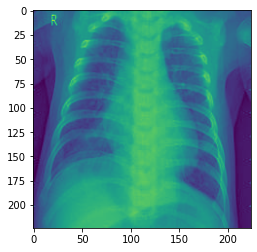

In [ ]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = random.choice(subfolders) ## selecting random folder
subfolder_path = os.path.join(train_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(subfolder_path) ## get all file names from sub folder
file_name = random.choice(file_names) ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image
## Showing the image
plt.imshow(image)
plt.show()

**Using pre-trained model: VGG16**

Found 5246 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
164/164 [==============================] - 101s 472ms/step - loss: 1.9645 - accuracy: 0.7314 - val_loss: 0.6577 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 68s 413ms/step - loss: 0.6475 - accuracy: 0.7339 - val_loss: 0.6158 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 66s 402ms/step - loss: 0.5737 - accuracy: 0.7442 - val_loss: 0.5870 - val_accuracy: 0.6234
Epoch 4/10
164/164 [==============================] - 67s 408ms/step - loss: 0.3125 - accuracy: 0.8647 - val_loss: 0.6641 - val_accuracy: 0.7324
Epoch 5/10
164/164 [==============================] - 68s 412ms/step - loss: 0.1771 - accuracy: 0.9300 - val_loss: 0.9987 - val_accuracy: 0.7548
Epoch 6/10
164/164 [==============================] - 68s 412ms/step - loss: 0.1646 - accuracy: 0.9346 - val_loss: 0.9472 - va

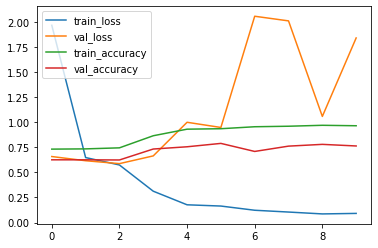

In [ ]:
## VGG16
from tensorflow.keras.applications.vgg16 import VGG16
image_size = (224, 224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load VGG16 model with pretrained weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

# create the final model
model = tf.keras.Model(inputs=vgg_model.input, outputs=x)


# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

## saving the model
model.save('model_vgg16.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


We could see that accuracy of the model while training is 96.42 but val_Accuracy is 76.28. This can be the case of overfitting hence will go for dropouts to remove the overfitting.

Classification of the test image with respect to trained model

In [ ]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'PNEUMONIA' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'person1_virus_8.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image


# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_vgg16.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 1s 809ms/step
The predicted class is: PNEUMONIA


**Hyper parameter tuning**

Found 5246 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Epoch 1/6
164/164 [==============================] - 75s 416ms/step - loss: 0.5750 - accuracy: 0.7429 - val_loss: 0.6962 - val_accuracy: 0.6250
Epoch 2/6
164/164 [==============================] - 67s 410ms/step - loss: 0.5734 - accuracy: 0.7429 - val_loss: 0.6976 - val_accuracy: 0.6250
Epoch 3/6
164/164 [==============================] - 69s 418ms/step - loss: 0.5714 - accuracy: 0.7429 - val_loss: 0.6989 - val_accuracy: 0.6250
Epoch 4/6
164/164 [==============================] - 67s 411ms/step - loss: 0.5709 - accuracy: 0.7429 - val_loss: 0.6987 - val_accuracy: 0.6250
Epoch 5/6
164/164 [==============================] - 68s 412ms/step - loss: 0.5713 - accuracy: 0.7429 - val_loss: 0.6980 - val_accuracy: 0.6250
Epoch 6/6
164/164 [==============================] - 68s 412ms/step - loss: 0.5712 - accuracy: 0.7429 - val_loss: 0.6959 - val_accuracy: 0.6250


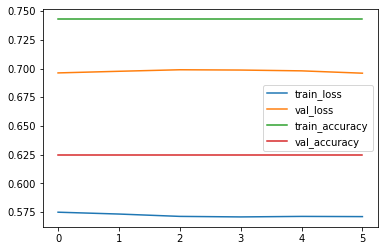

Epoch 1/6
164/164 [==============================] - 68s 414ms/step - loss: 0.5698 - accuracy: 0.7429 - val_loss: 0.6882 - val_accuracy: 0.6250
Epoch 2/6
164/164 [==============================] - 67s 409ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6931 - val_accuracy: 0.6250
Epoch 3/6
164/164 [==============================] - 67s 409ms/step - loss: 0.5700 - accuracy: 0.7429 - val_loss: 0.6917 - val_accuracy: 0.6250
Epoch 4/6
164/164 [==============================] - 67s 410ms/step - loss: 0.5704 - accuracy: 0.7429 - val_loss: 0.6967 - val_accuracy: 0.6250
Epoch 5/6
164/164 [==============================] - 67s 410ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6958 - val_accuracy: 0.6250
Epoch 6/6
164/164 [==============================] - 67s 410ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6926 - val_accuracy: 0.6250


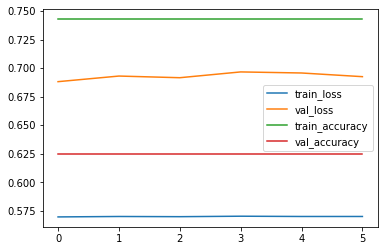

Epoch 1/6
164/164 [==============================] - 67s 411ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6920 - val_accuracy: 0.6250
Epoch 2/6
164/164 [==============================] - 68s 413ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6935 - val_accuracy: 0.6250
Epoch 3/6
164/164 [==============================] - 67s 410ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6935 - val_accuracy: 0.6250
Epoch 4/6
164/164 [==============================] - 67s 410ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6945 - val_accuracy: 0.6250
Epoch 5/6
164/164 [==============================] - 68s 413ms/step - loss: 0.5703 - accuracy: 0.7429 - val_loss: 0.6958 - val_accuracy: 0.6250
Epoch 6/6
164/164 [==============================] - 67s 409ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6984 - val_accuracy: 0.6250


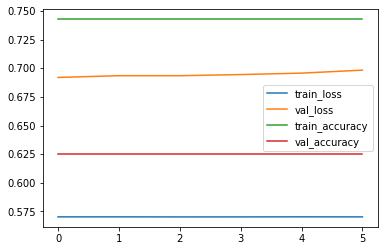

Epoch 1/6
164/164 [==============================] - 68s 414ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6979 - val_accuracy: 0.6250
Epoch 2/6
164/164 [==============================] - 67s 409ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6962 - val_accuracy: 0.6250
Epoch 3/6
164/164 [==============================] - 67s 411ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6949 - val_accuracy: 0.6250
Epoch 4/6
164/164 [==============================] - 68s 413ms/step - loss: 0.5703 - accuracy: 0.7429 - val_loss: 0.6976 - val_accuracy: 0.6250
Epoch 5/6
164/164 [==============================] - 67s 409ms/step - loss: 0.5701 - accuracy: 0.7429 - val_loss: 0.6988 - val_accuracy: 0.6250
Epoch 6/6
164/164 [==============================] - 67s 410ms/step - loss: 0.5703 - accuracy: 0.7429 - val_loss: 0.6969 - val_accuracy: 0.6250


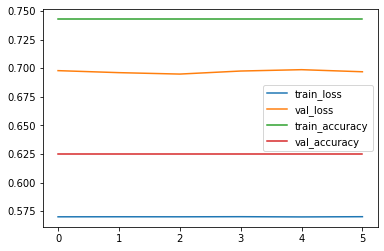

Best dropout rate: 0.2


In [ ]:
## VGG16
from tensorflow.keras.applications.vgg16 import VGG16
image_size = (224, 224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load VGG16 model with pretrained weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)

# add dropout layer and tune the dropout rate
dropout_rate = [0.2, 0.3, 0.4, 0.5]
for rate in dropout_rate:
    x = Dropout(rate)(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

# create the final model
model = tf.keras.Model(inputs=vgg_model.input, outputs=x)


# compile the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model with hyperparameter tuning
epochs = 6
dropout_acc = []
for rate in dropout_rate:
    model.layers[-2].rate = rate
    model.layers[-2].set_weights([np.random.normal(loc=0.0, scale=0.01, size=(256,train_generator.num_classes)), np.zeros((train_generator.num_classes,))])
    history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)
    # plot the training history
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.show()
    dropout_acc.append((rate, history.history['val_accuracy'][-1]))

# choose the best dropout rate based on validation accuracy
best_dropout_rate = sorted(dropout_acc, key=lambda x: x[1], reverse=True)[0][0]
print(f"Best dropout rate: {best_dropout_rate}")

# train the model with the best dropout rate
model.layers[-2].set_weights([np.random.normal(loc=0.0, scale=0.01, size=(256,train_generator.num_classes)), np.zeros((train_generator.num_classes,))])




## saving the model
model.save('model_vgg16_dropout.h5')




We can see for all different dropouts accuracy is same 74.29 and val_accuracy is also constant which is 62.50. Model is learning much in this case hence going for further hyperparameter tuning.

**Testing the model post hyper parameter tuning**

In [ ]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'PNEUMONIA' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'person1_virus_6.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image


# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_vgg16_dropout.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 216ms/step
The predicted class is: PNEUMONIA


**HyperParametr tuning with optimizer and learning rate**

Found 5246 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/6
164/164 [==============================] - 79s 446ms/step - loss: 0.3951 - accuracy: 0.8364 - val_loss: 0.7545 - val_accuracy: 0.6635
Epoch 2/6
164/164 [==============================] - 73s 442ms/step - loss: 0.2347 - accuracy: 0.9295 - val_loss: 0.3539 - val_accuracy: 0.8734
Epoch 3/6
164/164 [==============================] - 73s 442ms/step - loss: 0.1904 - accuracy: 0.9548 - val_loss: 0.3629 - val_accuracy: 0.8638
Epoch 4/6
164/164 [==============================] - 73s 442ms/step - loss: 0.1781 - accuracy: 0.9588 - val_loss: 0.5552 - val_accuracy: 0.7692
Epoch 5/6
164/164 [==============================] - 72s 441ms/step - loss: 0.1640 - accuracy: 0.9685 - val_loss: 0.5035 - val_accuracy: 0.8093
Epoch 6/6
164/164 [==============================] - 73s 442ms/step - loss: 0.1576 - accuracy: 0.9693 - val_loss: 0.7776 - val_accuracy: 0.7019


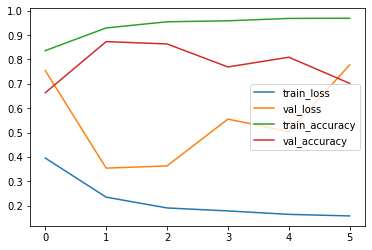

Epoch 1/6
164/164 [==============================] - 73s 444ms/step - loss: 0.1800 - accuracy: 0.9623 - val_loss: 0.6229 - val_accuracy: 0.7436
Epoch 2/6
164/164 [==============================] - 73s 442ms/step - loss: 0.1588 - accuracy: 0.9685 - val_loss: 0.3916 - val_accuracy: 0.8526
Epoch 3/6
164/164 [==============================] - 73s 442ms/step - loss: 0.1472 - accuracy: 0.9752 - val_loss: 0.2813 - val_accuracy: 0.9103
Epoch 4/6
164/164 [==============================] - 75s 457ms/step - loss: 0.1432 - accuracy: 0.9785 - val_loss: 0.7988 - val_accuracy: 0.6955
Epoch 5/6
164/164 [==============================] - 73s 442ms/step - loss: 0.1431 - accuracy: 0.9777 - val_loss: 0.5086 - val_accuracy: 0.8125
Epoch 6/6
164/164 [==============================] - 75s 457ms/step - loss: 0.1316 - accuracy: 0.9840 - val_loss: 0.4190 - val_accuracy: 0.8542


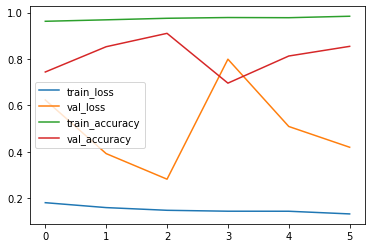

Epoch 1/6
164/164 [==============================] - 73s 445ms/step - loss: 0.1784 - accuracy: 0.9594 - val_loss: 0.4992 - val_accuracy: 0.8173
Epoch 2/6
164/164 [==============================] - 75s 457ms/step - loss: 0.1413 - accuracy: 0.9798 - val_loss: 0.4560 - val_accuracy: 0.8365
Epoch 3/6
164/164 [==============================] - 75s 457ms/step - loss: 0.1335 - accuracy: 0.9834 - val_loss: 0.4048 - val_accuracy: 0.8606
Epoch 4/6
164/164 [==============================] - 73s 444ms/step - loss: 0.1319 - accuracy: 0.9821 - val_loss: 0.4012 - val_accuracy: 0.8574
Epoch 5/6
164/164 [==============================] - 72s 442ms/step - loss: 0.1264 - accuracy: 0.9844 - val_loss: 0.6533 - val_accuracy: 0.7516
Epoch 6/6
164/164 [==============================] - 73s 442ms/step - loss: 0.1265 - accuracy: 0.9855 - val_loss: 0.4766 - val_accuracy: 0.8301


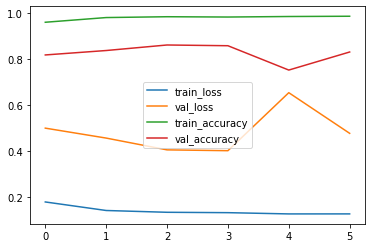

Epoch 1/6
164/164 [==============================] - 73s 445ms/step - loss: 0.1628 - accuracy: 0.9647 - val_loss: 0.5723 - val_accuracy: 0.7869
Epoch 2/6
164/164 [==============================] - 73s 442ms/step - loss: 0.1309 - accuracy: 0.9815 - val_loss: 0.7019 - val_accuracy: 0.7340
Epoch 3/6
164/164 [==============================] - 73s 442ms/step - loss: 0.1246 - accuracy: 0.9855 - val_loss: 0.4904 - val_accuracy: 0.8237
Epoch 4/6
164/164 [==============================] - 73s 443ms/step - loss: 0.1220 - accuracy: 0.9861 - val_loss: 0.5164 - val_accuracy: 0.8141
Epoch 5/6
164/164 [==============================] - 73s 443ms/step - loss: 0.1190 - accuracy: 0.9865 - val_loss: 0.4783 - val_accuracy: 0.8285
Epoch 6/6
164/164 [==============================] - 73s 442ms/step - loss: 0.1211 - accuracy: 0.9867 - val_loss: 0.4797 - val_accuracy: 0.8285


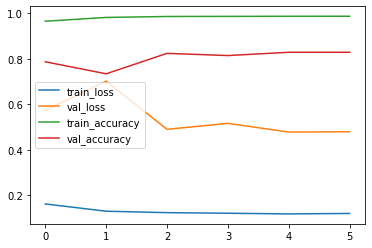

Best dropout rate: 0.3


In [ ]:
## VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adagrad

image_size = (224, 224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load VGG16 model with pretrained weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)

# add dropout layer and tune the dropout rate
dropout_rate = [0.2, 0.3, 0.4, 0.5]
for rate in dropout_rate:
    x = Dropout(rate)(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

# create the final model
model = tf.keras.Model(inputs=vgg_model.input, outputs=x)


# compile the model
optimizer = Adagrad(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model with hyperparameter tuning
epochs = 6
dropout_acc = []
for rate in dropout_rate:
    model.layers[-2].rate = rate
    model.layers[-2].set_weights([np.random.normal(loc=0.0, scale=0.01, size=(256,train_generator.num_classes)), np.zeros((train_generator.num_classes,))])
    history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)
    # plot the training history
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.show()
    dropout_acc.append((rate, history.history['val_accuracy'][-1]))

# choose the best dropout rate based on validation accuracy
best_dropout_rate = sorted(dropout_acc, key=lambda x: x[1], reverse=True)[0][0]
print(f"Best dropout rate: {best_dropout_rate}")

# train the model with the best dropout rate
model.layers[-2].set_weights([np.random.normal(loc=0.0, scale=0.01, size=(256,train_generator.num_classes)), np.zeros((train_generator.num_classes,))])




## saving the model
model.save('model_vgg16_dropout_lr_adagrad.h5')




Testing the model with random image

In [ ]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'PNEUMONIA' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'person1_virus_6.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image


# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_vgg16_dropout_lr_adagrad.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 248ms/step
The predicted class is: PNEUMONIA


**VGG19**

Found 5246 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
80134624/80134624 [==============================] - 0s 0us/step
Epoch 1/10
164/164 [==============================] - 86s 488ms/step - loss: 3.4255 - accuracy: 0.7434 - val_loss: 0.5067 - val_accuracy: 0.7420
Epoch 2/10
164/164 [==============================] - 81s 496ms/step - loss: 0.2222 - accuracy: 0.9075 - val_loss: 0.6392 - val_accuracy: 0.7596
Epoch 3/10
164/164 [==============================] - 79s 483ms/step - loss: 0.1863 - accuracy: 0.9257 - val_loss: 0.5018 - val_accuracy: 0.7484
Epoch 4/10
164/164 [==============================] - 79s 484ms/step - loss: 0.1412 - accuracy: 0.9464 - val_loss: 0.5882 - val_accuracy: 0.7788
Epoch 5/10
164/164 [==============================] - 82s 498ms/step - loss: 0.1053 - accuracy: 0.9598 - val_loss: 0.8610 - val_accuracy: 0.7500
Epoch 6/10
164/164 [==============================] - 80s 484ms/step - loss: 0.1227 - accuracy: 0.9546 - val_loss: 2.8137 - val

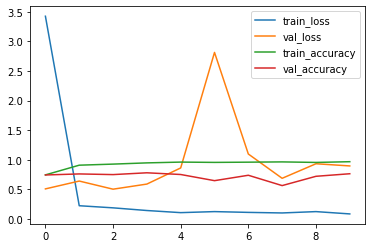

In [ ]:
## VGG19
from tensorflow.keras.applications.vgg19 import VGG19
image_size = (224, 224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load VGG16 model with pretrained weights
vgg_model_19 = VGG19(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x = Flatten()(vgg_model_19.output)
x = Dense(256, activation='relu')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

# create the final model
model = tf.keras.Model(inputs=vgg_model_19.input, outputs=x)


# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

## saving the model
model.save('model_vgg19.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


**Testing the trained model VGG19**

In [ ]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'PNEUMONIA' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'person1_virus_6.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_vgg19.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 148ms/step
The predicted class is: PNEUMONIA


**Adding dropout to vgg19 as it is overfitting**

Found 5246 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 84s 480ms/step - loss: 0.9540 - accuracy: 0.2571 - val_loss: 0.7779 - val_accuracy: 0.3750
Epoch 2/10
164/164 [==============================] - 78s 476ms/step - loss: 0.7514 - accuracy: 0.2892 - val_loss: 0.6894 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 78s 475ms/step - loss: 0.6463 - accuracy: 0.7429 - val_loss: 0.6630 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5992 - accuracy: 0.7429 - val_loss: 0.6642 - val_accuracy: 0.6250
Epoch 5/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5801 - accuracy: 0.7430 - val_loss: 0.6730 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5732 - accuracy: 0.7429 - val_loss: 0.6818 - val_accuracy: 0.6250
Epoch 7/10
164/164 [===========================

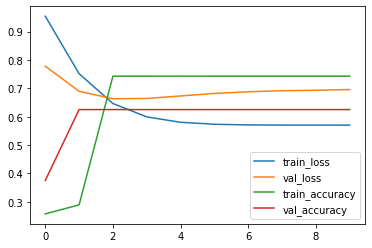

Epoch 1/10
164/164 [==============================] - 78s 476ms/step - loss: 0.6388 - accuracy: 0.6454 - val_loss: 0.6619 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5785 - accuracy: 0.7429 - val_loss: 0.6741 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5731 - accuracy: 0.7429 - val_loss: 0.6830 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 78s 476ms/step - loss: 0.5720 - accuracy: 0.7429 - val_loss: 0.6883 - val_accuracy: 0.6250
Epoch 5/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5718 - accuracy: 0.7429 - val_loss: 0.6903 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5703 - accuracy: 0.7429 - val_loss: 0.6912 - val_accuracy: 0.6250
Epoch 7/10
164/164 [==============================] - 80s 487ms/step - loss: 0.5707 - accuracy: 0.7429 - val_loss: 0.6930 - val_ac

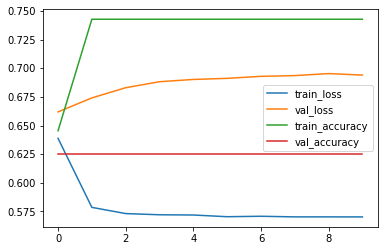

Epoch 1/10
164/164 [==============================] - 78s 476ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6954 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5700 - accuracy: 0.7429 - val_loss: 0.6937 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 78s 476ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6921 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5701 - accuracy: 0.7429 - val_loss: 0.6961 - val_accuracy: 0.6250
Epoch 5/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5703 - accuracy: 0.7429 - val_loss: 0.6981 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6961 - val_accuracy: 0.6250
Epoch 7/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6912 - val_ac

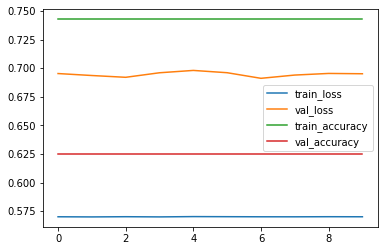

Epoch 1/10
164/164 [==============================] - 78s 476ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6958 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6943 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 80s 488ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6941 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6909 - val_accuracy: 0.6250
Epoch 5/10
164/164 [==============================] - 80s 488ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6965 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6924 - val_accuracy: 0.6250
Epoch 7/10
164/164 [==============================] - 78s 475ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.6933 - val_ac

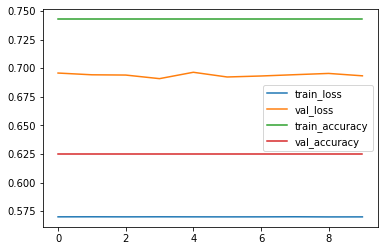

Best dropout rate: 0.2


In [ ]:
## VGG19
from tensorflow.keras.applications.vgg19 import VGG19


image_size = (224, 224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load VGG16 model with pretrained weights
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)

# add dropout layer and tune the dropout rate
dropout_rate = [0.2, 0.3, 0.4, 0.5]
for rate in dropout_rate:
    x = Dropout(rate)(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

# create the final model
model = tf.keras.Model(inputs=vgg_model.input, outputs=x)


# compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model with hyperparameter tuning
epochs = 10
dropout_acc = []
for rate in dropout_rate:
    model.layers[-2].rate = rate
    model.layers[-2].set_weights([np.random.normal(loc=0.0, scale=0.01, size=(256,train_generator.num_classes)), np.zeros((train_generator.num_classes,))])
    history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)
    # plot the training history
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.show()
    dropout_acc.append((rate, history.history['val_accuracy'][-1]))

# choose the best dropout rate based on validation accuracy
best_dropout_rate = sorted(dropout_acc, key=lambda x: x[1], reverse=True)[0][0]
print(f"Best dropout rate: {best_dropout_rate}")

# train the model with the best dropout rate
model.layers[-2].set_weights([np.random.normal(loc=0.0, scale=0.01, size=(256,train_generator.num_classes)), np.zeros((train_generator.num_classes,))])




## saving the model
model.save('model_vgg19_dropout.h5')




**Testing the model with dropouts**

In [ ]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'PNEUMONIA' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'person1_virus_6.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_vgg19_dropout.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 165ms/step
The predicted class is: PNEUMONIA


**Hyperparameter tuning with dropout and adargrad**

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 568s 3s/step - loss: 0.4045 - accuracy: 0.8410 - val_loss: 0.4534 - val_accuracy: 0.8077
Epoch 2/10
164/164 [==============================] - 87s 531ms/step - loss: 0.2443 - accuracy: 0.9547 - val_loss: 0.5666 - val_accuracy: 0.7516
Epoch 3/10
164/164 [==============================] - 89s 541ms/step - loss: 0.2238 - accuracy: 0.9671 - val_loss: 0.6652 - val_accuracy: 0.7003
Epoch 4/10
164/164 [==============================] - 91s 554ms/step - loss: 0.2113 - accuracy: 0.9750 - val_loss: 0.4950 - val_accuracy: 0.8045
Epoch 5/10
164/164 [==============================] - 91s 554ms/step - loss: 0.2029 - accuracy: 0.9801 - val_loss: 0.3484 - val_accuracy: 0.8926
Epoch 6/10
164/164 [==============================] - 91s 556ms/step - loss: 0.1994 - accuracy: 0.9822 - val_loss: 0.4923 - val_accuracy: 0.8141
Epoch 7/10
164/164 [=============================

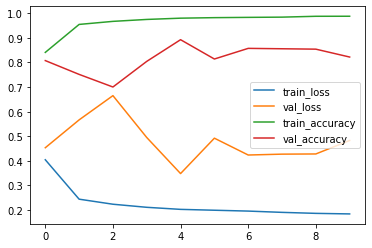

Best dropout rate: 0.3


In [ ]:
## VGG19
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adagrad


image_size = (224, 224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load VGG16 model with pretrained weights
model_vgg19_dropout_adagrad_lr = VGG19(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x_1 = Flatten()(model_vgg19_dropout_adagrad_lr.output)
x_1 = Dense(256, activation='relu')(x_1)

# add dropout layer and tune the dropout rate
dropout_rate = [0.3]
for rate in dropout_rate:
    x_1 = Dropout(rate)(x_1)
x_1 = Dense(train_generator.num_classes, activation='softmax')(x_1)
x_1 = Dense(train_generator.num_classes, activation='softmax')(x_1)

# create the final model
model_vgg19_adagrad_lr = tf.keras.Model(inputs=model_vgg19_dropout_adagrad_lr.input, outputs=x_1)


# compile the model
optimizer = Adagrad(learning_rate=0.001)
model_vgg19_adagrad_lr.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model with hyperparameter tuning
epochs = 10
dropout_acc = []
for rate in dropout_rate:
    model_vgg19_adagrad_lr.layers[-2].rate = rate
    model_vgg19_adagrad_lr.layers[-2].set_weights([np.random.normal(loc=0.0, scale=0.01, size=(256,train_generator.num_classes)), np.zeros((train_generator.num_classes,))])
    history = model_vgg19_adagrad_lr.fit(train_generator, epochs=epochs, validation_data=test_generator)
    # plot the training history
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.show()
    dropout_acc.append((rate, history.history['val_accuracy'][-1]))

# choose the best dropout rate based on validation accuracy
best_dropout_rate = sorted(dropout_acc, key=lambda x: x[1], reverse=True)[0][0]
print(f"Best dropout rate: {best_dropout_rate}")

# train the model with the best dropout rate
model_vgg19_adagrad_lr.layers[-2].set_weights([np.random.normal(loc=0.0, scale=0.01, size=(256,train_generator.num_classes)), np.zeros((train_generator.num_classes,))])




## saving the model
model_vgg19_adagrad_lr.save('model_vgg19_dropout_adagrad_lr.h5')




**Testing the model**

In [ ]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'PNEUMONIA' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'person1_virus_6.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_vgg19_dropout_adagrad_lr.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 1s 850ms/step
The predicted class is: PNEUMONIA


**Hyperparameter tuning Adargrad**

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 94s 544ms/step - loss: 0.2350 - accuracy: 0.8983 - val_loss: 0.3072 - val_accuracy: 0.8894
Epoch 2/10
164/164 [==============================] - 90s 548ms/step - loss: 0.0813 - accuracy: 0.9679 - val_loss: 0.5739 - val_accuracy: 0.7997
Epoch 3/10
164/164 [==============================] - 89s 543ms/step - loss: 0.0467 - accuracy: 0.9820 - val_loss: 1.7314 - val_accuracy: 0.7003
Epoch 4/10
164/164 [==============================] - 89s 544ms/step - loss: 0.0392 - accuracy: 0.9851 - val_loss: 0.8999 - val_accuracy: 0.7837
Epoch 5/10
164/164 [==============================] - 89s 542ms/step - loss: 0.0256 - accuracy: 0.9925 - val_loss: 0.9475 - val_accuracy: 0.7965
Epoch 6/10
164/164 [==============================] - 89s 544ms/step - loss: 0.0146 - accuracy: 0.9964 - val_loss: 0.8055 - val_accuracy: 0.8349
Epoch 7/10
164/164 [===========================

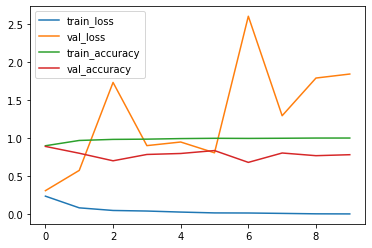

In [ ]:
## VGG19
from tensorflow.keras.applications.vgg19 import VGG19


image_size = (224, 224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load VGG16 model with pretrained weights
vgg_model_19_ada = VGG19(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x_19_ada = Flatten()(vgg_model_19_ada.output)
x_19_ada = Dense(256, activation='relu')(x_19_ada)
x_19_ada = Dense(train_generator.num_classes, activation='softmax')(x_19_ada)

# create the final model
model_19_ada = tf.keras.Model(inputs=vgg_model_19_ada.input, outputs=x_19_ada)

## HYPERPARAMETER tuning. Changing learning rate and optimizer
learning_rate = 0.001
optimizer = Adagrad(learning_rate=learning_rate)

# compile the model
model_19_ada.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model_19_ada.fit(train_generator, epochs=10, validation_data=test_generator)

## saving the model
model_19_ada.save('model_19_ada.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


**Testing the model**

In [ ]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'PNEUMONIA' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'person1_virus_6.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_19_ada.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 147ms/step
The predicted class is: PNEUMONIA


**Hyper parameter tuning in VGG19 Nadam**

Found 5246 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 88s 490ms/step - loss: 0.7103 - accuracy: 0.7291 - val_loss: 0.6821 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 79s 482ms/step - loss: 0.5736 - accuracy: 0.7429 - val_loss: 0.7028 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 79s 480ms/step - loss: 0.5734 - accuracy: 0.7429 - val_loss: 0.6996 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 78s 478ms/step - loss: 0.5726 - accuracy: 0.7429 - val_loss: 0.6844 - val_accuracy: 0.6250
Epoch 5/10
164/164 [==============================] - 78s 478ms/step - loss: 0.5733 - accuracy: 0.7429 - val_loss: 0.7078 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 78s 476ms/step - loss: 0.5712 - accuracy: 0.7429 - val_loss: 0.7086 - val_accuracy: 0.6250
Epoch 7/10
164/164 [===========================

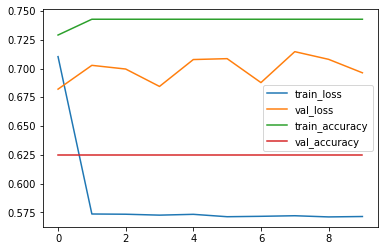

In [ ]:
## VGG19
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Nadam

image_size = (224, 224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load VGG16 model with pretrained weights
vgg_model_19 = VGG19(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x = Flatten()(vgg_model_19.output)
x = Dense(256, activation='relu')(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

# create the final model
model = tf.keras.Model(inputs=vgg_model_19.input, outputs=x)

## HYPERPARAMETER tuning. Changing learning rate and optimizer
learning_rate = 0.001
optimizer = Nadam(learning_rate=learning_rate)

# compile the model
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

## saving the model
model.save('model_vgg19_nadam_lr.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


**Testing the trained model Vgg19 post hyperparameter tuning**

In [ ]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'PNEUMONIA' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'person1_virus_6.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_vgg19_nadam_lr.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 227ms/step
The predicted class is: PNEUMONIA


**RESNET 50**

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
94765736/94765736 [==============================] - 5s 0us/step


Epoch 1/10
164/164 [==============================] - 90s 380ms/step - loss: 0.2209 - accuracy: 0.9094 - val_loss: 2.2145 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 59s 361ms/step - loss: 0.0815 - accuracy: 0.9708 - val_loss: 4.8275 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 59s 361ms/step - loss: 0.0501 - accuracy: 0.9828 - val_loss: 5.3785 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 58s 355ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 3.0244 - val_accuracy: 0.6250
Epoch 5/10
164/164 [==============================] - 59s 358ms/step - loss: 0.0221 - accuracy: 0.9943 - val_loss: 2.2347 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 59s 358ms/step - loss: 0.0172 - accuracy: 0.9958 - val_loss: 1.7777 - val_accuracy: 0.6250
Epoch 7/10
164/164 [==============================] - 58s 355ms/step - loss: 0.0141 - accuracy: 0.9968 - val_loss: 1.6628 - val_ac

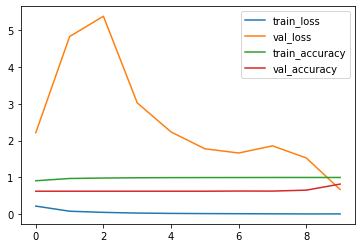

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50


# set image size and batch size
image_size = (224, 224)
batch_size = 32


# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load ResNet50 model with pretrained weights
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x_res = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
x_res = tf.keras.layers.Flatten()(x_res)
x_res = tf.keras.layers.Dense(256, activation='relu')(x_res)
x_res = tf.keras.layers.Dropout(0.5)(x_res)
x_res = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x_res)

# create the final model
model_res = tf.keras.Model(inputs=resnet_model.input, outputs=x_res)

# compile the model
opt = tf.keras.optimizers.Adagrad(lr=0.001)
model_res.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model_res.fit(train_generator, epochs=10, validation_data=test_generator)

# save the model
model_res.save('model_resnet50.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

**Testing resnet50**

In [ ]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'PNEUMONIA' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'person1_virus_6.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_resnet50.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 1s 1s/step
The predicted class is: PNEUMONIA


**RESNET 50 hyperparameter tuning dropout to 0.3**

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
94765736/94765736 [==============================] - 4s 0us/step


Epoch 1/10
164/164 [==============================] - 932s 5s/step - loss: 0.1781 - accuracy: 0.9293 - val_loss: 4.2957 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 60s 365ms/step - loss: 0.0673 - accuracy: 0.9763 - val_loss: 10.0941 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 59s 361ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 9.3584 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 59s 356ms/step - loss: 0.0227 - accuracy: 0.9954 - val_loss: 7.0995 - val_accuracy: 0.6250
Epoch 5/10
164/164 [==============================] - 59s 362ms/step - loss: 0.0181 - accuracy: 0.9946 - val_loss: 3.7071 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 59s 356ms/step - loss: 0.0131 - accuracy: 0.9977 - val_loss: 2.3933 - val_accuracy: 0.6250
Epoch 7/10
164/164 [==============================] - 59s 356ms/step - loss: 0.0120 - accuracy: 0.9966 - val_loss: 2.2242 - val_acc

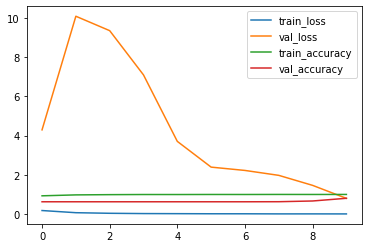

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50


# set image size and batch size
image_size = (224, 224)
batch_size = 32


# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load ResNet50 model with pretrained weights
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x_res = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)
x_res = tf.keras.layers.Flatten()(x_res)
x_res = tf.keras.layers.Dense(256, activation='relu')(x_res)
x_res = tf.keras.layers.Dropout(0.3)(x_res)
x_res = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x_res)

# create the final model
model_res = tf.keras.Model(inputs=resnet_model.input, outputs=x_res)

# compile the model
opt = tf.keras.optimizers.Adagrad(lr=0.001)
model_res.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model_res.fit(train_generator, epochs=10, validation_data=test_generator)

# save the model
model_res.save('model_resnet50_dropout.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

**Testing the model**

In [6]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'NORMAL' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'IM-0045-0001.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_resnet50_dropout.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 1s 1s/step
The predicted class is: NORMAL


**Changing optimizer and learning rate for resnet50**

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Epoch 1/10
164/164 [==============================] - 111s 371ms/step - loss: 0.1627 - accuracy: 0.9459 - val_loss: 41.4333 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 58s 356ms/step - loss: 0.0857 - accuracy: 0.9698 - val_loss: 1.0241 - val_accuracy: 0.6138
Epoch 3/10
164/164 [==============================] - 59s 360ms/step - loss: 0.0774 - accuracy: 0.9700 - val_loss: 20.0253 - val_accuracy: 0.6250
Epoch 4/10
164/164 [==============================] - 59s 358ms/step - loss: 0.0573 - accuracy: 0.9820 - val_loss: 38.6452 - val_accuracy: 0.6250
Epoch 5/10
164/164 [==============================] - 59s 359ms/step - loss: 0.0524 - accuracy: 0.9818 - val_loss: 8.8572 - val_accuracy: 0.6250
Epoch 6/10
164/164 [==============================] - 60s 363ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 2.9571 - val_accuracy: 0.6859
Epoch 7/10
164/164 [==============================] - 58s 356ms/step - loss: 0.0521 - accuracy: 0.9826 - val_loss: 2.6773 - va

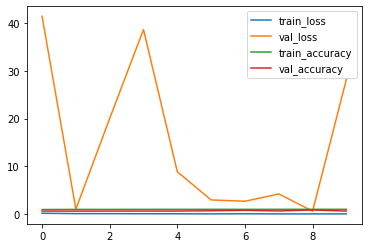

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50


# set image size and batch size
image_size = (224, 224)
batch_size = 32


# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')

# load ResNet50 model with pretrained weights
resnet_model_adam = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# add custom classification layers
x_res_adam = tf.keras.layers.GlobalAveragePooling2D()(resnet_model_adam.output)
x_res_adam = tf.keras.layers.Flatten()(x_res_adam)
x_res_adam = tf.keras.layers.Dense(256, activation='relu')(x_res_adam)
x_res_adam = tf.keras.layers.Dropout(0.5)(x_res_adam)
x_res_adam = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x_res_adam)

# create the final model
model_res_adam = tf.keras.Model(inputs=resnet_model_adam.input, outputs=x_res_adam)

# compile the model
opt = tf.keras.optimizers.Adam(lr=0.001)
model_res_adam.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model_res_adam.fit(train_generator, epochs=10, validation_data=test_generator)

# save the model
model_res_adam.save('model_resnet50_adam.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

**Testing the model**

In [8]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'NORMAL' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'IM-0045-0001.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_resnet50_adam.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 1s 840ms/step
The predicted class is: PNEUMONIA


**Our own model**

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 1148s 7s/step - loss: 0.2468 - accuracy: 0.8968 - val_loss: 0.8950 - val_accuracy: 0.6891
Epoch 2/10
164/164 [==============================] - 17s 106ms/step - loss: 0.1191 - accuracy: 0.9543 - val_loss: 0.6335 - val_accuracy: 0.8109
Epoch 3/10
164/164 [==============================] - 18s 112ms/step - loss: 0.0953 - accuracy: 0.9648 - val_loss: 0.9863 - val_accuracy: 0.7212
Epoch 4/10
164/164 [==============================] - 17s 106ms/step - loss: 0.0669 - accuracy: 0.9761 - val_loss: 1.2347 - val_accuracy: 0.7724
Epoch 5/10
164/164 [==============================] - 17s 105ms/step - loss: 0.0555 - accuracy: 0.9795 - val_loss: 1.1597 - val_accuracy: 0.7532
Epoch 6/10
164/164 [==============================] - 18s 109ms/step - loss: 0.0528 - accuracy: 0.9824 - val_loss: 1.6741 - val_accuracy: 0.7276
Epoch 7/10
164/164 [============================

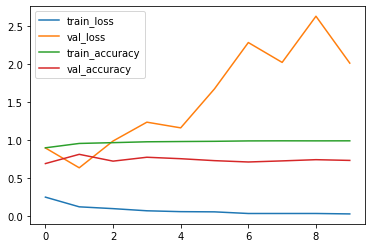

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [6]:
# define image dimensions and batch size
image_size = (224,224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')


# define your own model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model_1.fit( train_generator, epochs=10, validation_data= test_generator )


# save the model
model_1.save('model_1.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Flow of the model

model_1.summary()


**Testing the model**

In [8]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'NORMAL' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'IM-0069-0001.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_1.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 131ms/step
The predicted class is: NORMAL


Hyperparameter tuning

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 25s 110ms/step - loss: 0.5716 - accuracy: 0.7370 - val_loss: 0.6355 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 19s 114ms/step - loss: 0.4929 - accuracy: 0.7565 - val_loss: 0.6196 - val_accuracy: 0.6074
Epoch 3/10
164/164 [==============================] - 18s 111ms/step - loss: 0.3810 - accuracy: 0.8318 - val_loss: 0.6475 - val_accuracy: 0.6651
Epoch 4/10
164/164 [==============================] - 18s 108ms/step - loss: 0.3038 - accuracy: 0.8754 - val_loss: 0.4382 - val_accuracy: 0.7949
Epoch 5/10
164/164 [==============================] - 18s 110ms/step - loss: 0.2401 - accuracy: 0.9037 - val_loss: 1.0198 - val_accuracy: 0.6474
Epoch 6/10
164/164 [==============================] - 17s 104ms/step - loss: 0.2233 - accuracy: 0.9121 - val_loss: 0.6725 - val_accuracy: 0.7196
Epoch 7/10
164/164 [===========================

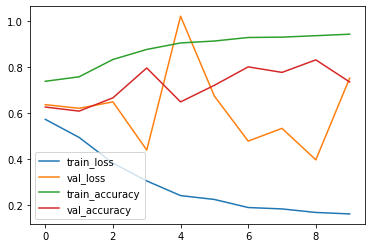

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [6]:
# define image dimensions and batch size
image_size = (224,224)
batch_size = 32
img_height = 224
img_width = 224

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')


# define your own model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
opt = tf.keras.optimizers.Adagrad(learning_rate=0.001)
model_2.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model_2.fit( train_generator, epochs=10, validation_data= test_generator )


# save the model
model_2.save('model_2.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Flow of the model

model_2.summary()


In [7]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'NORMAL' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'IM-0069-0001.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_2.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 348ms/step
The predicted class is: NORMAL


**PAdding**

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 26s 119ms/step - loss: 0.2976 - accuracy: 0.8740 - val_loss: 1.2217 - val_accuracy: 0.7179
Epoch 2/10
164/164 [==============================] - 18s 109ms/step - loss: 0.1029 - accuracy: 0.9620 - val_loss: 0.7150 - val_accuracy: 0.7724
Epoch 3/10
164/164 [==============================] - 17s 105ms/step - loss: 0.0785 - accuracy: 0.9731 - val_loss: 1.3309 - val_accuracy: 0.7372
Epoch 4/10
164/164 [==============================] - 18s 108ms/step - loss: 0.0645 - accuracy: 0.9761 - val_loss: 1.5422 - val_accuracy: 0.7564
Epoch 5/10
164/164 [==============================] - 17s 105ms/step - loss: 0.0434 - accuracy: 0.9834 - val_loss: 1.4820 - val_accuracy: 0.7644
Epoch 6/10
164/164 [==============================] - 18s 108ms/step - loss: 0.0373 - accuracy: 0.9870 - val_loss: 2.2109 - val_accuracy: 0.7404
Epoch 7/10
164/164 [===========================

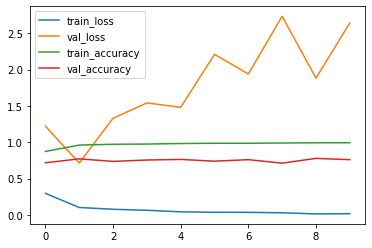

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 128)     

In [8]:
# define image dimensions and batch size
image_size = (224,224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')


# define your own model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'same', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model_3.fit( train_generator, epochs=10, validation_data= test_generator )


# save the model
model_3.save('model_3.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Flow of the model

model_3.summary()


In [9]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'NORMAL' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'IM-0069-0001.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_3.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 317ms/step
The predicted class is: NORMAL


Earlystop and dropouts

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 28s 121ms/step - loss: 0.5201 - accuracy: 0.7636 - val_loss: 0.4862 - val_accuracy: 0.7708
Epoch 2/10
164/164 [==============================] - 19s 113ms/step - loss: 0.2222 - accuracy: 0.9102 - val_loss: 0.6499 - val_accuracy: 0.7885
Epoch 3/10
164/164 [==============================] - 20s 123ms/step - loss: 0.1624 - accuracy: 0.9429 - val_loss: 0.7014 - val_accuracy: 0.7804
Epoch 4/10
164/164 [==============================] - 18s 112ms/step - loss: 0.1189 - accuracy: 0.9570 - val_loss: 0.8468 - val_accuracy: 0.8221


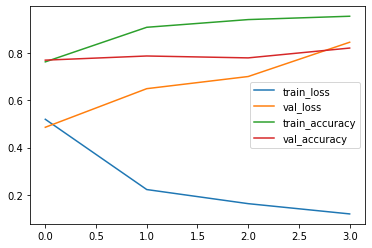

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)       

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
# define image dimensions and batch size
image_size = (224,224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')


# define your own model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'same', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model_4.fit( train_generator, epochs=10, validation_data= test_generator,callbacks=[early_stop])


# save the model
model_4.save('model_4.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Flow of the model

model_4.summary()


In [11]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'NORMAL' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'IM-0069-0001.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_4.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 455ms/step
The predicted class is: NORMAL


**Added more layers to it**

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 25s 106ms/step - loss: 0.5034 - accuracy: 0.7307 - val_loss: 0.6104 - val_accuracy: 0.6250
Epoch 2/10
164/164 [==============================] - 17s 106ms/step - loss: 0.3102 - accuracy: 0.8847 - val_loss: 0.9219 - val_accuracy: 0.7484
Epoch 3/10
164/164 [==============================] - 18s 111ms/step - loss: 0.2341 - accuracy: 0.9300 - val_loss: 1.4126 - val_accuracy: 0.7708
Epoch 4/10
164/164 [==============================] - 17s 106ms/step - loss: 0.2046 - accuracy: 0.9304 - val_loss: 1.8221 - val_accuracy: 0.7628


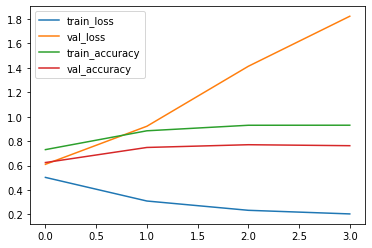

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 28, 28, 128)     

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
# define image dimensions and batch size
image_size = (224,224)
batch_size = 32

# create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size,
                                                    batch_size=batch_size, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size,
                                                  batch_size=batch_size, class_mode='categorical')


# define your own model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'same', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3),padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model_5.fit( train_generator, epochs=10, validation_data= test_generator,callbacks=[early_stop])


# save the model
model_5.save('model_5.h5')

# plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Flow of the model

model_5.summary()


In [14]:
## Displaying the image after preprocessing(resizing of image)
## Showing an image from train/test folder 
#subfolders = os.listdir(train_folder) ## listing all subfolders
subfolder = 'NORMAL' ## selecting random folder
subfolder_path = os.path.join(test_folder, subfolder) ## Create the file path to the selected folder
file_names = os.listdir(test_folder) ## get all file names from sub folder
file_name = 'IM-0069-0001.jpeg' ## selecting random file
image = Image.open(os.path.join(subfolder_path, file_name)) ## loading the image

image_size = (224,224)
# Convert the image to RGB
image = image.convert('RGB')

# Resize the image to match the input size of the model
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image array
image_array = image_array.astype(np.float32) / 255.0

# Reshape the image array to match the expected input shape of the model
image_array = np.reshape(image_array, (1,image_size[0], image_size[1], 3))

## Load the model
model = load_model('model_5.h5')

# Make the prediction
prediction = model.predict(image_array)

# Get the predicted class label
predicted_class = list(train_generator.class_indices.keys())[np.argmax(prediction)]

print('The predicted class is:', predicted_class)

1/1 [==============================] - 0s 374ms/step
The predicted class is: NORMAL
